In [1]:
# Classification
import numpy as np
from paddle import fluid 
import matplotlib.pyplot as plt # pip install matplotlib -i https://pypi.tuna.tsinghua.edu.cn/simple

### Input data

In [2]:
x = np.arange(1,15).reshape(-1,1) # Random data
#reshape(-1,..) automatically reshape
#y = x*3 + 5 # linear
y = np.array([[8],[11],[14],[17],[20],[23],[26],[29],[32],[35],[38],[41],[44],[47]])

In [3]:
# find the linear regression
display(x,y)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14]])

array([[ 8],
       [11],
       [14],
       [17],
       [20],
       [23],
       [26],
       [29],
       [32],
       [35],
       [38],
       [41],
       [44],
       [47]])

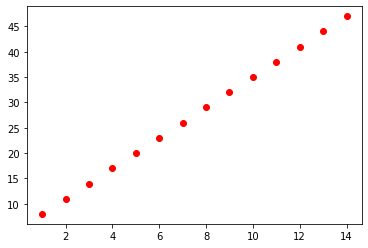

In [4]:
# plot the scatter
plt.scatter(x,y,color = 'red')
plt.show()

### Variable, parameters, function, loss, optimization

In [5]:
data_x = fluid.data(name = 'x',shape = [1,1],dtype ='float32')
data_y = fluid.data(name = 'y',shape = [1,1],dtype ='float32')

# fc layer
w = fluid.layers.create_parameter(shape = [1],dtype = 'float32', name = 'w')
b = fluid.layers.create_parameter(shape = [1],dtype = 'float32', name = 'b')
# fcn: y = x*w + b
y_pred = fluid.layers.elementwise_add(fluid.layers.matmul(data_x, w), b)
# want y_pred close to data_y


# return the predicted value
#y_pred = fluid.layers.fc(input=data_x,size = 1) # fc layer, automatically set w and b


# least square，Gauss
cost = fluid.layers.mean(fluid.layers.square_error_cost(input = y_pred,label = data_y))
print('----------',cost.shape)
sgd = fluid.optimizer.SGD(learning_rate=0.01) # Stochastic gradient descent
_ = sgd.minimize(cost) # least square
cost.shape 

---------- (1,)


(1,)

### Execute

In [6]:
cpu  = fluid.CPUPlace()
exe = fluid.Executor(cpu)
exe.run(fluid.default_startup_program()) # Initialize variables
mp = fluid.default_main_program()

In [7]:
test_p = mp.clone(for_test=True) # For validation

### Feed data

In [8]:
for i in range(100):
    cost_ = 0
    for j in range(14):
        feed_x = x[j].astype(np.float32).reshape(1,1)
        feed_y = y[j].astype(np.float32).reshape(1,1)
        outs = exe.run(program = mp,feed = {'x':feed_x,'y':feed_y},fetch_list = [cost])
        cost_ += outs[0][0]/14
    print('--------Execution times：%d----------Loss：%0.4f'%(i,cost_))

--------Execution times：0----------Loss：32.0506
--------Execution times：1----------Loss：0.9413
--------Execution times：2----------Loss：0.8669
--------Execution times：3----------Loss：0.7983
--------Execution times：4----------Loss：0.7352
--------Execution times：5----------Loss：0.6771
--------Execution times：6----------Loss：0.6236
--------Execution times：7----------Loss：0.5743
--------Execution times：8----------Loss：0.5289
--------Execution times：9----------Loss：0.4871
--------Execution times：10----------Loss：0.4486
--------Execution times：11----------Loss：0.4131
--------Execution times：12----------Loss：0.3804
--------Execution times：13----------Loss：0.3504
--------Execution times：14----------Loss：0.3227
--------Execution times：15----------Loss：0.2972
--------Execution times：16----------Loss：0.2737
--------Execution times：17----------Loss：0.2520
--------Execution times：18----------Loss：0.2321
--------Execution times：19----------Loss：0.2137
--------Execution times：20----------Loss：0.1969
-

### Validation

In [9]:
# Input:20，output:?
exe.run(program=test_p,feed = {'x':np.array([[20]]).astype(np.float32),
                               'y':y[0].astype(np.float32).reshape(1,1)},fetch_list=[y_pred])

[array([65.011246], dtype=float32)]

$$f(x) = wx + b$$

w = 3 b + 5

In [10]:
w_,b_ = exe.run(feed = {'x':x[0].astype(np.float32),'y':y[0].astype(np.float32)},fetch_list=[w,b])
print(w_,b_)

[3.0034485] [4.9587955]
